In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('/root/bryton/github/cv_research/bryton/ml_sealice/2016.csv')

In [41]:
df
delicings = np.where(df['mechanicalRemoval'].isnull() == False)[0]

num_delicings = len(delicings)
num_site_weeks = len(df)

num_delicings / num_site_weeks

# Average time between delicings
# Number of delicings
# Pull specifically for Erko

0.04336734693877551

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


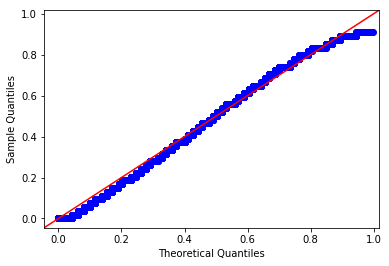

In [3]:
num = df.loc[df['avgAdultFemaleLice'] < 0.5, 'avgAdultFemaleLice']
#num = df.loc[df['avgMobileLice'] < 1.5, 'avgMobileLice']
#num = df.loc[df['avgStationaryLice'] < 0.5, 'avgStationaryLice']

dist = dist=stats.distributions.beta
res = num
#res = np.log(1 + num)

fig = sm.qqplot(res, dist=dist, fit=True, line='45')

plt.show()

In [4]:
dist= dist=stats.distributions.expon

id                                                45024
localityNo                                        11756
year                                               2016
week                                                  1
hasReportedLice                                    True
hasMechanicalRemoval                              False
hasBathTreatment                                  False
hasInFeedTreatment                                False
hasCleanerFishDeployed                            False
isFallow                                          False
avgAdultFemaleLice                                 0.47
avgMobileLice                                       1.2
avgStationaryLice                                  0.77
seaTemperature                                      7.4
bathTreatments                                       []
inFeedTreatments                                     []
cleanerFish                                         NaN
mechanicalRemoval                               

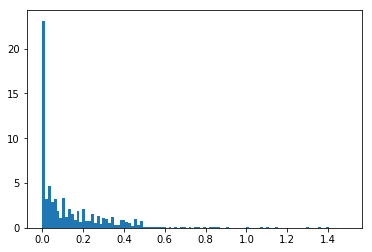

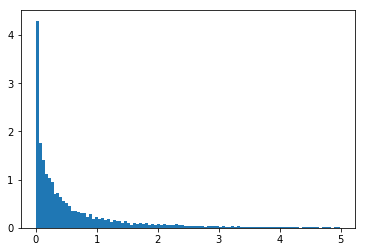

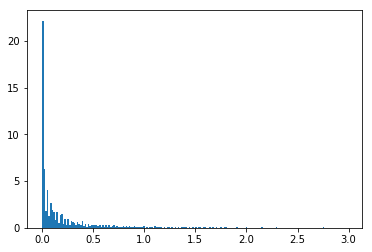

0.1643296068427371
0.07
0.7355653511404562
0.29
0.27914915966386555
0.05
0.00: 0.00, 0.00, 0.00
1.00: 0.00, 0.00, 0.00
2.00: 0.00, 0.00, 0.00
3.00: 0.00, 0.00, 0.00
4.00: 0.00, 0.00, 0.00
5.00: 0.00, 0.00, 0.00
6.00: 0.00, 0.00, 0.00
7.00: 0.00, 0.00, 0.00
8.00: 0.00, 0.00, 0.00
9.00: 0.00, 0.00, 0.00
10.00: 0.00, 0.00, 0.00
11.00: 0.00, 0.00, 0.00
12.00: 0.00, 0.01, 0.00
13.00: 0.00, 0.01, 0.00
14.00: 0.00, 0.02, 0.00
15.00: 0.00, 0.02, 0.00
16.00: 0.00, 0.02, 0.00
17.00: 0.00, 0.03, 0.00
18.00: 0.00, 0.03, 0.00
19.00: 0.00, 0.04, 0.00
20.00: 0.00, 0.04, 0.00
21.00: 0.00, 0.05, 0.00
22.00: 0.00, 0.05, 0.00
23.00: 0.00, 0.05, 0.00
24.00: 0.00, 0.06, 0.00
25.00: 0.00, 0.07, 0.00
26.00: 0.00, 0.08, 0.00
27.00: 0.00, 0.08, 0.00
28.00: 0.01, 0.09, 0.00
29.00: 0.01, 0.10, 0.01
30.00: 0.01, 0.10, 0.01
31.00: 0.01, 0.10, 0.01
32.00: 0.01, 0.12, 0.01
33.00: 0.02, 0.12, 0.01
34.00: 0.02, 0.13, 0.02
35.00: 0.02, 0.14, 0.02
36.00: 0.02, 0.15, 0.02
37.00: 0.03, 0.15, 0.02
38.00: 0.03, 0.17, 0.02
3

In [5]:
print(df.iloc[0])

plt.hist(df.loc[df['avgAdultFemaleLice'] < 1.5, 'avgAdultFemaleLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgMobileLice'] < 5, 'avgMobileLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgStationaryLice'] < 3, 'avgStationaryLice'], bins='auto', density=True)
plt.show()

print(np.mean(df['avgAdultFemaleLice']))
print(np.median(df['avgAdultFemaleLice']))

print(np.mean(df['avgMobileLice']))
print(np.median(df['avgMobileLice']))

print(np.mean(df['avgStationaryLice']))
print(np.median(df['avgStationaryLice']))

for i in range(0, 100, 1):
    p1 = np.percentile(df['avgAdultFemaleLice'], i) # return 50th percentile, e.g median.
    p2 = np.percentile(df['avgMobileLice'], i) # return 50th percentile, e.g median.
    p3 = np.percentile(df['avgStationaryLice'], i) # return 50th percentile, e.g median.
    print('%0.2f: %0.2f, %0.2f, %0.2f' % (i, p1, p2, p3))

In [6]:
my_df = df.loc[:,'avgAdultFemaleLice':'seaTemperature']

new_df = my_df.copy()
norm_df = my_df.copy()

for x in my_df.columns:
    my_mean = my_df[x].median()
    my_std = my_df[x].std()
    my_iqr = stats.iqr(my_df[x])
    
    my_row = my_df[x].copy()
    new_df[x] = my_row / my_iqr
    norm_df[x] = (my_row - my_mean) / my_std

0.969125150060024


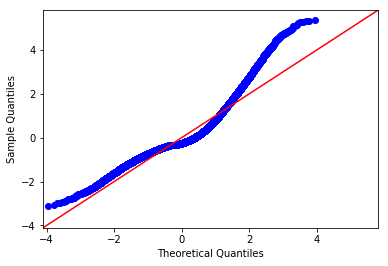

                            OLS Regression Results                            
Dep. Variable:      avgStationaryLice   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1319.
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:54:30   Log-Likelihood:                -16068.
No. Observations:               25833   AIC:                         3.216e+04
Df Residuals:                   25823   BIC:                         3.224e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4316      0.089      4.822      0.0

In [7]:
#good_indices_1 = (my_df == 0).any(axis=1) == False
good_indices_2 = my_df['avgAdultFemaleLice'] < 1.5
good_indices_3 = my_df['avgMobileLice'] < 5
good_indices_4 = my_df['avgStationaryLice'] < 3

good_indices = good_indices_2 & good_indices_3 & good_indices_4

print(np.sum(good_indices) / len(good_indices))

my_df_X = new_df.filter(['avgAdultFemaleLice', 'avgMobileLice', 'seaTemperature'], axis=1)
my_df_Y = new_df['avgStationaryLice'][good_indices]

my_df_X = my_df_X.loc[good_indices, :]

my_df_X = np.log(1 + my_df_X)
my_df_Y = my_df_Y
#my_df_Y = np.log(1 + my_df_Y)

my_df_X = np.hstack((my_df_X, my_df_X ** 2, np.log(1 + my_df_X)))

myX = sm.add_constant(my_df_X)
myY = np.log(1 + my_df_Y)

model = sm.OLS(myY, myX).fit()

res = model.resid
fig = sm.qqplot(res, dist=stats.distributions.norm, fit=True, line='45')

plt.show()

print(model.summary())

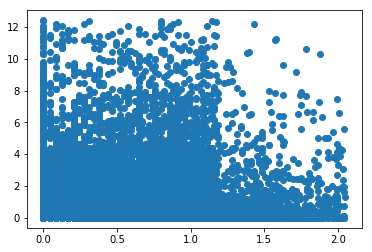

In [8]:
plt.scatter(my_df_X[:,0], my_df_Y)
plt.show()

0.20905499982844722


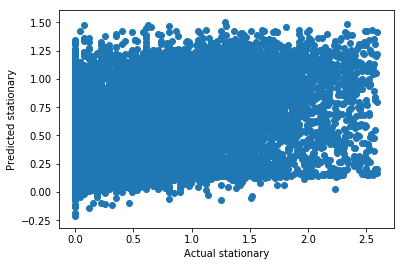

In [9]:
predY = model.predict(myX)
error = predY - myY

avg_error = np.median(np.abs(error))

print(avg_error)

plt.scatter(myY, predY)
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

None


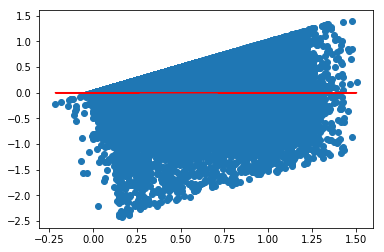

In [10]:
res_X = predY
res_Y = predY - myY

res_myX = sm.add_constant(res_X)
res_myY = res_Y

res_model = sm.OLS(res_myY, res_myX).fit_regularized(L1_wt=0)
res_predY = res_model.predict(res_myX)

print(res_model.summary())

plt.scatter(res_X, res_Y)
plt.plot(res_X, res_predY, color='red')
plt.show()

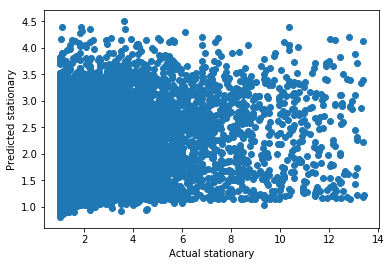

0.2855853637740051


In [11]:
plt.scatter(np.exp(myY), np.exp(predY))
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

error = np.exp(predY) - np.exp(myY)

avg_error = np.median(np.abs(error))

print(avg_error)

In [12]:
# Trying a different model that is time-series based

      avgAdultFemaleLice  avgMobileLice  avgStationaryLice  seaTemperature
0                   0.47           1.20               0.77             7.4
489                 0.45           1.30               0.40             7.2
984                 0.48           2.15               0.23             6.4
1484                0.10           0.18               0.15             6.1
1984                0.17           0.13               0.13             6.0
2474                0.10           0.20               0.25             6.2
2942                0.13           0.27               0.23             6.3
3413                0.17           0.33               0.50             5.8
3881                0.20           0.55               0.45             5.8
4333                0.25           0.60               0.20             5.7
4789                0.27           0.73               0.37             6.0
5245                0.25           1.05               0.05             6.0
5688                0.30 

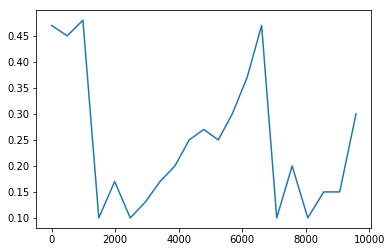

In [13]:
subset = my_df.loc[df['localityNo'] == 11756]

print(subset)

plt.plot(subset['avgAdultFemaleLice'])
plt.show()

(21, 4)
(21, 4)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     8.745
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           0.000476
Time:                        23:54:31   Log-Likelihood:                -1.8085
No. Observations:                  20   AIC:                             13.62
Df Residuals:                      15   BIC:                             18.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9369      0.696    

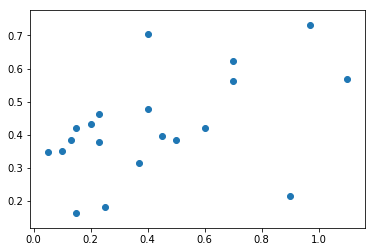

In [14]:
print(subset.shape)

subset_v = subset.values
print(subset_v.shape)

diff = subset_v[1:21] - subset_v[0:20]

diff_myX = np.hstack((subset_v[1:21,0:1], subset_v[0:20,:]))
diff_myY = subset_v[1:21, 2]

diff_model = sm.OLS(diff_myY, diff_myX).fit()
diff_predY = diff_model.predict(diff_myX)

print(diff_model.summary())

plt.scatter(diff_myY, diff_predY)
plt.show()

In [15]:
localityNumbers = np.unique(df['localityNo'])

all_diff_myX = None
all_diff_myY = None

for localityNo in localityNumbers:
    subset = my_df.loc[df['localityNo'] == localityNo]
    subset_v = subset.values
    num_obs = subset_v.shape[0]

    diff = subset_v[1:num_obs] - subset_v[0:(num_obs - 1)]
    
    diff_myX = np.hstack((subset_v[1:num_obs,0:2], subset_v[0:(num_obs - 1),0:3]))
    diff_myY = subset_v[1:num_obs, 2]
    
    if all_diff_myX is None:
        all_diff_myX = diff_myX
        all_diff_myY = diff_myY
    else:
        all_diff_myX = np.vstack((all_diff_myX, diff_myX))
        all_diff_myY = np.concatenate((all_diff_myY, diff_myY))
        
print('done')
print(all_diff_myX.shape)
print(all_diff_myY.shape)

done
(25859, 5)
(25859,)


In [16]:
all_diff_myX

array([[0.3 , 1.35, 0.23, 0.9 , 0.07],
       [0.03, 0.37, 0.3 , 1.35, 0.05],
       [0.2 , 0.7 , 0.03, 0.37, 0.  ],
       ...,
       [0.12, 0.68, 0.08, 0.48, 0.38],
       [0.03, 0.16, 0.12, 0.68, 0.31],
       [0.  , 0.07, 0.03, 0.16, 0.09]])

0.9534011369349162
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2467.
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:54:32   Log-Likelihood:                 9571.4
No. Observations:               24654   AIC:                        -1.912e+04
Df Residuals:                   24643   BIC:                        -1.903e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0160      0.002 

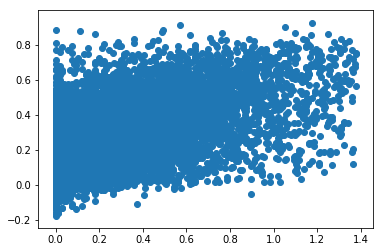

In [17]:
good_indices_2 = all_diff_myX[:,0] < 1.5
good_indices_3 = all_diff_myX[:,1] < 5
good_indices_4 = all_diff_myX[:,2] < 1.5
good_indices_5 = all_diff_myX[:,3] < 5
good_indices_6 = all_diff_myX[:,4] < 3
good_indices_7 = all_diff_myY < 3

good_indices = good_indices_2 & good_indices_3 & good_indices_4 & good_indices_5 & good_indices_6 & good_indices_7

print(np.sum(good_indices) / len(good_indices))

all_filtered_myX = all_diff_myX[good_indices, :]
all_filtered_myY = all_diff_myY[good_indices]

all_myX = sm.add_constant(np.hstack((all_filtered_myX, np.log(1 + all_filtered_myX))))
all_myY = np.log(1+all_filtered_myY)

all_diff_model = sm.OLS(all_myY, all_myX).fit()
all_predY = all_diff_model.predict(all_myX)

print(all_diff_model.summary())

plt.scatter(all_myY, all_predY)
plt.show()

In [18]:
final_predY = np.exp(all_predY) - 1
final_myY = np.exp(all_myY) - 1

error = np.median(np.abs(final_predY - final_myY))

print(np.median(final_myY))

print(error)

0.050000000000000044
0.05687063876234
